# Загрузка датасета

необходимые библиотеки

In [293]:
import pandas as pd

загрузка датасета

In [294]:
data =  pd.read_csv('brain_stroke.csv')

# Быстрый осмотр датасета

размерность данных

In [295]:
data.shape

(4981, 11)

признаки

In [296]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

краткая информация по признакам

In [297]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


## Посмотр уникальных значений столбцов с их количеством

In [298]:
data['gender'].value_counts()

,count
gender,
Female,2907
Male,2074


In [299]:
data['age'].value_counts()

,count
age,
78.00,102
57.00,92
54.00,85
51.00,84
79.00,84
...,...
1.16,3
0.48,3
0.40,2


In [300]:
data['hypertension'].value_counts()

,count
hypertension,
0,4502
1,479


In [301]:
data['heart_disease'].value_counts()

,count
heart_disease,
0,4706
1,275


In [302]:
data['ever_married'].value_counts()

,count
ever_married,
Yes,3280
No,1701


In [303]:
data['work_type'].value_counts()

,count
work_type,
Private,2860
Self-employed,804
children,673
Govt_job,644


In [304]:
data['Residence_type'].value_counts()

,count
Residence_type,
Urban,2532
Rural,2449


In [305]:
data['avg_glucose_level'].value_counts()

,count
avg_glucose_level,
93.88,6
73.00,5
83.16,5
91.85,5
72.49,5
...,...
130.56,1
67.78,1
116.12,1


In [306]:
data['bmi'].value_counts()

,count
bmi,
28.7,42
28.4,41
27.3,38
27.7,37
26.7,37
...,...
48.4,1
48.2,1
46.6,1


In [307]:
data['smoking_status'].value_counts()

,count
smoking_status,
never smoked,1838
Unknown,1500
formerly smoked,867
smokes,776


In [308]:
data['stroke'].value_counts()

,count
stroke,
0,4733
1,248


## Выводы после просмотра

В данных очень много несбалансированных признаков, с которыми в их первоначальном виде работать нельзя, поэтому перед балансировкой по ключевому признаку стоит произвести редактирование остальных столбцов.

Дальше будет описано, что нужно сделать для каждого столбца

1) gender: с данным столбцом всё в порядке, ничего не делаем;

2) age: в данном столбце слишком много уникальных значений, поэтому данные будут преобразованы в интервалы, например, если возраст > 90, то пишем 90, и так далее;

3) hypertension: по данному столбцу пока что ничего не известно, возможно стоит его сбалансировать вместе с целевым признаком, однако для этого стоит посмотреть корреляцию между этим столбцом и ключевым признаком;

4) heart_disease: по данному столбцу пока что ничего не известно, возможно стоит его сбалансировать вместе с целевым признаком, однако для этого стоит посмотреть корреляцию между этим столбцом и ключевым признаком;

5) ever_married: с данным столбцом всё в порядке, ничего не делаем;

6) work_type: с данным столбцом всё в порядке, ничего не делаем;

7) Residence_type: с данным столбцом всё в порядке, ничего не делаем;

8) avg_glucose_level: данный столбец содержит слишком много уникальных значений, поэтому стоит преобразовать его интервальным способом;

9) bmi: данный столбец содержит слишком много уникальных значений, поэтому стоит преобразовать его интервальным способом;

10) smoking_status: с данным столбцом, вроде, всё в порядке, правда, стоит подумать, что делать с значением Unknown, так как оно составляет существенную часть, возможно, данный столбец стоит удалить.

# Обработка столбцов

необходимые библиотеки

In [309]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

## Обработка столбца age

посмотрим на распределение значений признака

In [310]:
data['age'].describe()

,age
count,4981.000000
mean,43.419859
std,22.662755
min,0.080000
25%,25.000000
50%,45.000000
75%,61.000000
max,82.000000


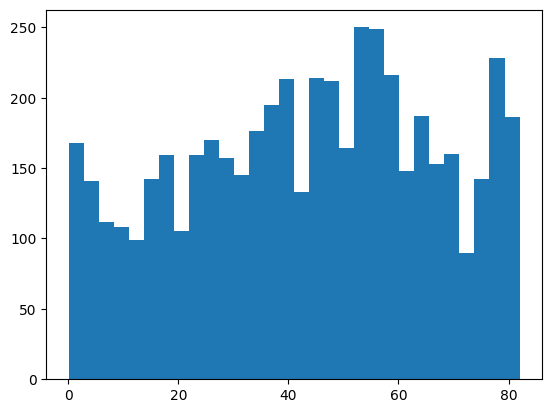

In [311]:
plt.hist(data['age'], bins=30)
plt.show()

значения +- лежат равномерно, так что просто определим группы, по десятелетиям, имя группы будем присваивать в качестве нового значения

функция обработки столбца age

In [312]:
def transform_age(age: int) -> int:
  return int(age // 10 * 10)

In [313]:
data['age'] = data['age'].apply(transform_age)

## Обработка столбца hypertension

посмотрим корреляцию с целевым признаком

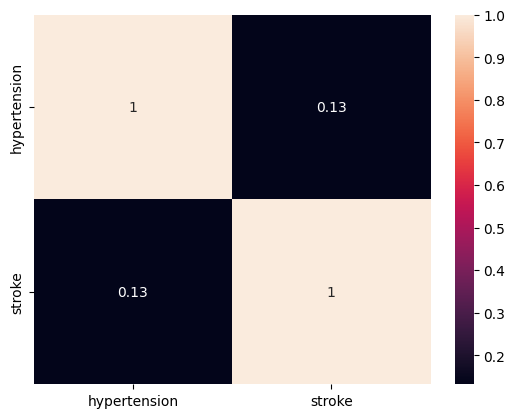

In [314]:
sns.heatmap(data[['hypertension', 'stroke']].corr(), annot=True)
plt.show()

In [315]:
data.loc[data['stroke'] == 0, ['hypertension']].value_counts()

,count
hypertension,
0,4320
1,413


In [316]:
data.loc[data['stroke'] == 1, ['hypertension']].value_counts()

,count
hypertension,
0,182
1,66


Некоторая корреляция есть, но она очень слабая, вероятно, столбце прийдётся удалить

## Обработка столбца heart_disease

посмотрим на корреляцию с целефым признаком

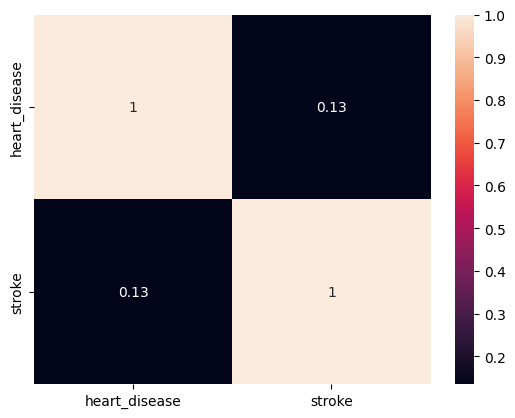

In [317]:
sns.heatmap(data[['heart_disease', 'stroke']].corr(), annot=True)
plt.show()

In [318]:
data.loc[data['stroke'] == 0, ['heart_disease']].value_counts()

,count
heart_disease,
0,4505
1,228


In [319]:
data.loc[data['stroke'] == 1, ['heart_disease']].value_counts()

,count
heart_disease,
0,201
1,47


Всё аналогично предыдущему столбцу: вроде, какая-то корреляция есть, но её может быть недостаточно

## Обработка столбца avg_glucose_level

посмотрим на распределение значений признака

In [320]:
data['avg_glucose_level'].describe()

,avg_glucose_level
count,4981.000000
mean,105.943562
std,45.075373
min,55.120000
25%,77.230000
50%,91.850000
75%,113.860000
max,271.740000


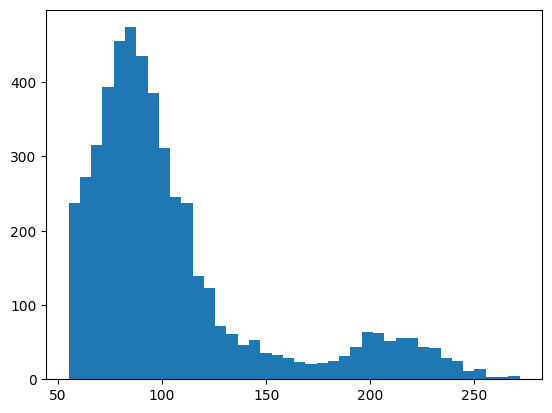

In [321]:
plt.hist(data['avg_glucose_level'], bins=40)
plt.show()

Видно, что основная масса значений лежит в диапазоне от 55 до, примерно, 113. В таком случае уместно будет поделить описанный выше интервал на десятки, а оставшийся на пятидесятки.

функция обработки столбца avg_glucose_level

In [322]:
def transform_glucose_level(avg_glucose_level: float) -> int:
  if avg_glucose_level < 113:
    return int(avg_glucose_level // 10 * 10)
  else:
    return int(avg_glucose_level // 50 * 50)

In [323]:
data['avg_glucose_level'] = data['avg_glucose_level'].apply(transform_glucose_level)

## Обработка столбца bmi

посмотрим на распределение значений признака

In [324]:
data['bmi'].describe()

,bmi
count,4981.000000
mean,28.498173
std,6.790464
min,14.000000
25%,23.700000
50%,28.100000
75%,32.600000
max,48.900000


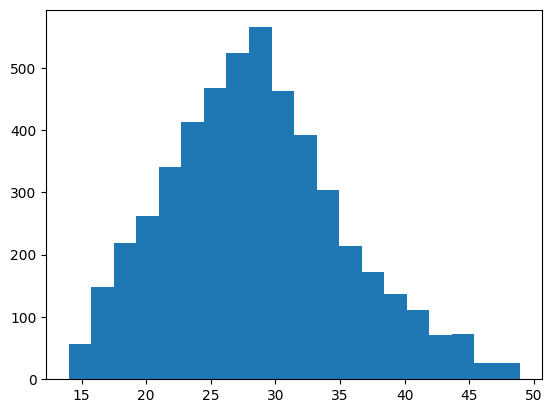

In [325]:
plt.hist(data['bmi'], bins=20)
plt.show()

поделим просто на интервалы по 5

функция обработки столбца bmi

In [326]:
def transform_bmi(bmi: float) -> int:
  return int(bmi // 5 * 5)

In [327]:
data['bmi'] = data['bmi'].apply(transform_bmi)

## Обработка столбца smoking_status

проведём декодирование столбца

In [328]:
lblEnc = LabelEncoder()
data['smoking_status'] = lblEnc.fit_transform(data['smoking_status'])

посмотрим на корреляцию с основным признаком

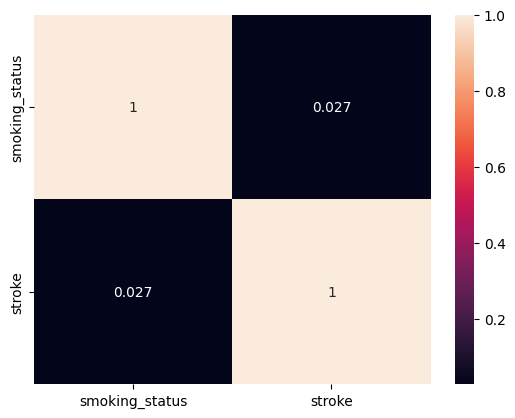

In [329]:
sns.heatmap(data[['smoking_status', 'stroke']].corr(), annot=True)
plt.show()

In [330]:
data.loc[data['stroke'] == 0, ['smoking_status']].value_counts()

,count
smoking_status,
2,1749
0,1453
1,797
3,734


In [331]:
data.loc[data['stroke'] == 1, ['smoking_status']].value_counts()

,count
smoking_status,
2,89
1,70
0,47
3,42


Тут корреляции нет вообще + дофига пропущенных данных, так что стоит этот столбец удалить

## Обработка категориальных столбцов

In [332]:
lblEnc = LabelEncoder()

data['gender'] = lblEnc.fit_transform(data['gender'])
data['ever_married'] = lblEnc.fit_transform(data['ever_married'])
data['work_type'] = lblEnc.fit_transform(data['work_type'])
data['Residence_type'] = lblEnc.fit_transform(data['Residence_type'])

In [333]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   gender             4981 non-null   int64
 1   age                4981 non-null   int64
 2   hypertension       4981 non-null   int64
 3   heart_disease      4981 non-null   int64
 4   ever_married       4981 non-null   int64
 5   work_type          4981 non-null   int64
 6   Residence_type     4981 non-null   int64
 7   avg_glucose_level  4981 non-null   int64
 8   bmi                4981 non-null   int64
 9   smoking_status     4981 non-null   int64
 10  stroke             4981 non-null   int64
dtypes: int64(11)
memory usage: 428.2 KB


# Принятие решений по столбцам

перед окончательным принятием решений выведем общую матрицу корреляции

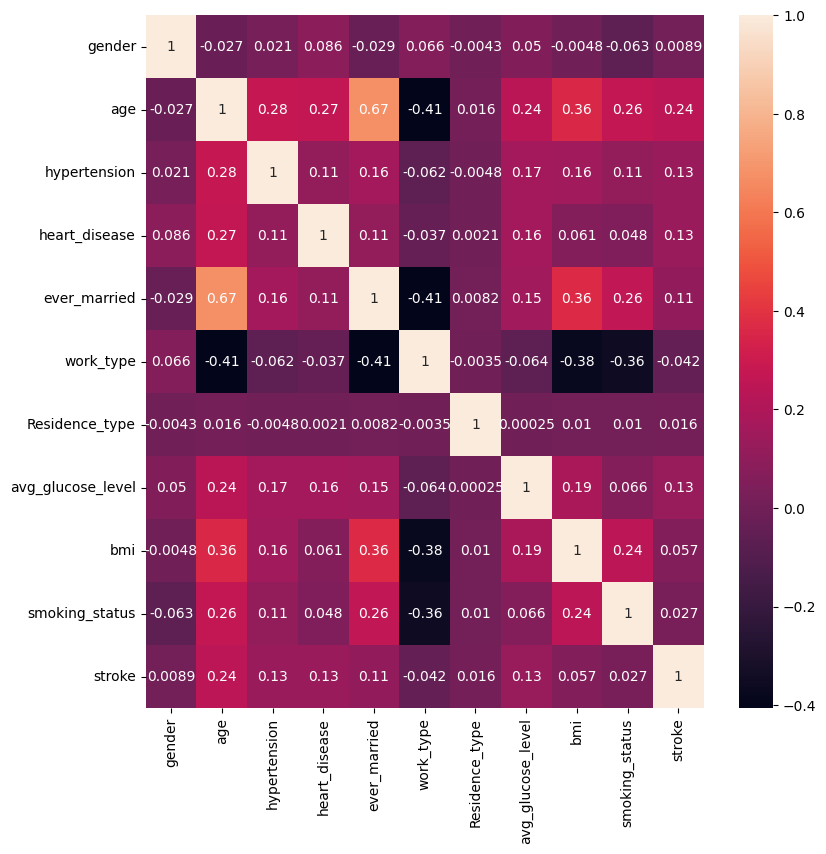

In [334]:
plt.figure(figsize=(9, 9))
sns.heatmap(data.corr(), annot=True)
plt.show()

Создадим копию данных с удалёнными столбцами, корреляция с целевым признаком которых меньше десятой доли единицы, а именно: gender, work_type, Residence_type, bmi, smoking_status

In [335]:
origin_data = data.copy()

transform_data = data.copy()

del transform_data['gender']
del transform_data['work_type']
del transform_data['Residence_type']
del transform_data['bmi']
del transform_data['smoking_status']

# отделение целевого признака

In [336]:
y = origin_data['stroke'].copy()

del origin_data['stroke']
del transform_data['stroke']

# Выясняем какой метод нормировки данных лучше всегоп подходит

необходимые библиотеки

In [337]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

разбиваем на train и test

без нормировки данных

In [338]:
od_train, od_test, y_train, y_test = train_test_split(origin_data, y, train_size=0.3, random_state=52)
td_train, td_test, y_train, y_test = train_test_split(transform_data, y, train_size=0.3, random_state=52)

dt_origin = DecisionTreeClassifier(max_depth=5, random_state=10)
dt_origin.fit(od_train, y_train)

dt_transform = DecisionTreeClassifier(max_depth=5, random_state=10)
dt_transform.fit(td_train, y_train)

dt_origin.score(od_test, y_test), dt_transform.score(td_test, y_test)

(0.9354746200172067, 0.941783768282191)

StandartScaler

In [339]:
std_scl = StandardScaler()

temp_origin_data = std_scl.fit_transform(origin_data)
temp_transform_data = std_scl.fit_transform(transform_data)

od_train, od_test, y_train, y_test = train_test_split(temp_origin_data, y, train_size=0.3, random_state=52)
td_train, td_test, y_train, y_test = train_test_split(temp_transform_data, y, train_size=0.3, random_state=52)

dt_origin = DecisionTreeClassifier(max_depth=5, random_state=10)
dt_origin.fit(od_train, y_train)

dt_transform = DecisionTreeClassifier(max_depth=5, random_state=10)
dt_transform.fit(td_train, y_train)

dt_origin.score(od_test, y_test), dt_transform.score(td_test, y_test)

(0.9354746200172067, 0.941783768282191)

MinMaxScaler

In [340]:
min_max_scl = MinMaxScaler()

temp_origin_data = min_max_scl.fit_transform(origin_data)
temp_transform_data = min_max_scl.fit_transform(transform_data)

od_train, od_test, y_train, y_test = train_test_split(temp_origin_data, y, train_size=0.3, random_state=52)
td_train, td_test, y_train, y_test = train_test_split(temp_transform_data, y, train_size=0.3, random_state=52)

dt_origin = DecisionTreeClassifier(max_depth=5, random_state=10)
dt_origin.fit(od_train, y_train)

dt_transform = DecisionTreeClassifier(max_depth=5, random_state=10)
dt_transform.fit(td_train, y_train)

dt_origin.score(od_test, y_test), dt_transform.score(td_test, y_test)

(0.9354746200172067, 0.9429308861485518)

Разницы особой нет, но MinMaxScaler показал себя чуть лучше остальных, впредь будем использовать его

In [341]:
origin_data = min_max_scl.fit_transform(origin_data)
transform_data = min_max_scl.fit_transform(transform_data)

# Далее будем применять разные методы балансировки и обучать на них 3 вида моделей: дерево решений, случайный лес, градиентный бустинг

необходимые библиотеки

In [342]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
import numpy as np
from sklearn.metrics import confusion_matrix

# Без применения методов балансировки

разбиваем выборку

In [343]:
od_train, od_test, y_train, y_test = train_test_split(origin_data, y, test_size=0.3, random_state=52)
td_train, td_test, y_train, y_test = train_test_split(transform_data, y, test_size=0.3, random_state=52)

## Выбираем лучшие параметры для моделей

дерево решений

In [344]:
GDCV = GridSearchCV( DecisionTreeClassifier(),
                     param_grid=[ { 'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                                    'min_samples_split': [3, 5, 8, 13, 21],
                                    'min_samples_leaf': [3, 5, 8, 13, 21] } ],
                     cv=5,
                     scoring='accuracy' )
GDCV.fit(origin_data, y)
GDCV.best_params_

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


{'max_depth': 3, 'min_samples_leaf': 8, 'min_samples_split': 3}

случайный лес

In [345]:
GDCV = GridSearchCV( RandomForestClassifier(),
                     param_grid=[ { 'max_depth': [3],
                                    'min_samples_split': [3],
                                    'min_samples_leaf': [8],
                                    'max_features': [40, 60, 70, 80, 100],
                                    'n_estimators': list(range(1, 100 + 1, 10)) } ],
                     cv=5,
                     scoring='accuracy' )
GDCV.fit(origin_data, y)
GDCV.best_params_

{'max_depth': 3,
 'max_features': 40,
 'min_samples_leaf': 8,
 'min_samples_split': 3,
 'n_estimators': 1}

градиентный бустинг

In [346]:
GDCV = GridSearchCV( xgb.XGBClassifier(),
                     param_grid=[ { 'max_depth': [3],
                                    'eta': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                                    'n_estimators': list(range(1, 100 + 1, 10)) } ],
                     cv=5,
                     scoring='accuracy' )
GDCV.fit(origin_data, y)
GDCV.best_params_

{'eta': 0.1, 'max_depth': 3, 'n_estimators': 1}

## Обучение моделей с вычисленными параметрами

### дерево решений

In [347]:
dt_or = DecisionTreeClassifier(max_depth=3, min_samples_leaf=8, min_samples_split=3)
dt_tr = DecisionTreeClassifier(max_depth=3, min_samples_leaf=8, min_samples_split=3)

dt_or.fit(od_train, y_train)
dt_tr.fit(td_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=8, min_samples_split=3)

In [348]:
print('train:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_train, dt_or.predict(od_train))))
print('precision = {0}'.format(metrics.precision_score(y_train, dt_or.predict(od_train))))
print('recall = {0}'.format(metrics.recall_score(y_train, dt_or.predict(od_train))))
print('f1 = {0}'.format(metrics.f1_score(y_train, dt_or.predict(od_train))))
print('test:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_test, dt_or.predict(od_test))))
print('precision = {0}'.format(metrics.precision_score(y_test, dt_or.predict(od_test))))
print('recall = {0}'.format(metrics.recall_score(y_test, dt_or.predict(od_test))))
print('f1 = {0}'.format(metrics.f1_score(y_test, dt_or.predict(od_test))))

train:
accuracy = 0.9549627079747561
precision = 0.0
recall = 0.0
f1 = 0.0
test:
accuracy = 0.9391304347826087
precision = 0.0
recall = 0.0
f1 = 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


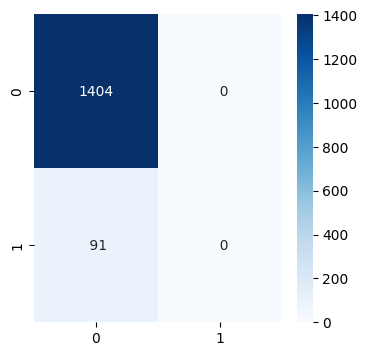

In [349]:
predictions = dt_or.predict(od_test)
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='3g')
plt.show()

In [350]:
print('train:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_train, dt_tr.predict(td_train))))
print('precision = {0}'.format(metrics.precision_score(y_train, dt_tr.predict(td_train))))
print('recall = {0}'.format(metrics.recall_score(y_train, dt_tr.predict(td_train))))
print('f1 = {0}'.format(metrics.f1_score(y_train, dt_tr.predict(td_train))))
print('test:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_test, dt_tr.predict(td_test))))
print('precision = {0}'.format(metrics.precision_score(y_test, dt_tr.predict(td_test))))
print('recall = {0}'.format(metrics.recall_score(y_test, dt_tr.predict(td_test))))
print('f1 = {0}'.format(metrics.f1_score(y_test, dt_tr.predict(td_test))))

train:
accuracy = 0.9549627079747561
precision = 0.0
recall = 0.0
f1 = 0.0
test:
accuracy = 0.9391304347826087
precision = 0.0
recall = 0.0
f1 = 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


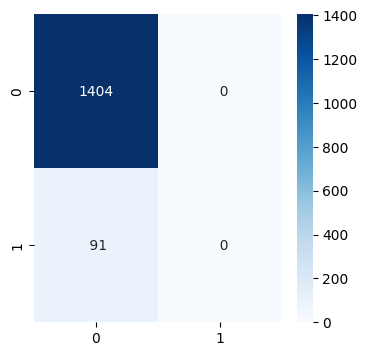

In [351]:
predictions = dt_tr.predict(td_test)
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='3g')
plt.show()

### случайный лес

In [352]:
rf_or = RandomForestClassifier(max_depth=3, max_features=40, min_samples_leaf=8, min_samples_split=3, n_estimators=11)
rf_tr = RandomForestClassifier(max_depth=3, max_features=40, min_samples_leaf=8, min_samples_split=3, n_estimators=11)

rf_or.fit(od_train, y_train)
rf_tr.fit(td_train, y_train)

RandomForestClassifier(max_depth=3, max_features=40, min_samples_leaf=8,
                       min_samples_split=3, n_estimators=11)

In [353]:
print('train:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_train, rf_or.predict(od_train))))
print('precision = {0}'.format(metrics.precision_score(y_train, rf_or.predict(od_train))))
print('recall = {0}'.format(metrics.recall_score(y_train, rf_or.predict(od_train))))
print('f1 = {0}'.format(metrics.f1_score(y_train, rf_or.predict(od_train))))
print('test:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_test, rf_or.predict(od_test))))
print('precision = {0}'.format(metrics.precision_score(y_test, rf_or.predict(od_test))))
print('recall = {0}'.format(metrics.recall_score(y_test, rf_or.predict(od_test))))
print('f1 = {0}'.format(metrics.f1_score(y_test, rf_or.predict(od_test))))

train:
accuracy = 0.9549627079747561
precision = 0.0
recall = 0.0
f1 = 0.0
test:
accuracy = 0.9391304347826087
precision = 0.0
recall = 0.0
f1 = 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


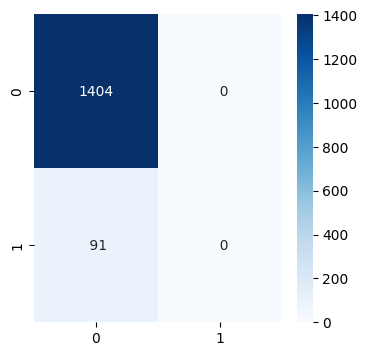

In [354]:
predictions = rf_or.predict(od_test)
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='3g')
plt.show()

In [355]:
print('train:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_train, rf_tr.predict(td_train))))
print('precision = {0}'.format(metrics.precision_score(y_train, rf_tr.predict(td_train))))
print('recall = {0}'.format(metrics.recall_score(y_train, rf_tr.predict(td_train))))
print('f1 = {0}'.format(metrics.f1_score(y_train, rf_tr.predict(td_train))))
print('test:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_test, rf_tr.predict(td_test))))
print('precision = {0}'.format(metrics.precision_score(y_test, rf_tr.predict(td_test))))
print('recall = {0}'.format(metrics.recall_score(y_test, rf_tr.predict(td_test))))
print('f1 = {0}'.format(metrics.f1_score(y_test, rf_tr.predict(td_test))))

train:
accuracy = 0.9549627079747561
precision = 0.0
recall = 0.0
f1 = 0.0
test:
accuracy = 0.9391304347826087
precision = 0.0
recall = 0.0
f1 = 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


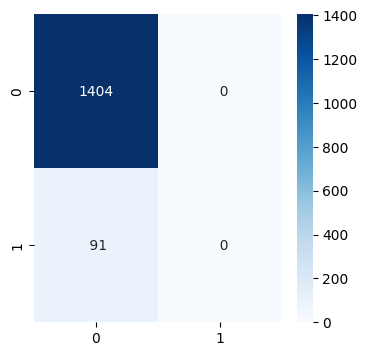

In [356]:
predictions = rf_tr.predict(td_test)
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='3g')
plt.show()

### градиентный бустинг

In [357]:
xgb_or = xgb.XGBClassifier(max_depth=3, n_estimators=1, eta=0.1)
xgb_tr = xgb.XGBClassifier(max_depth=3, n_estimators=1, eta=0.1)

xgb_or.fit(od_train, y_train)
xgb_tr.fit(td_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.1, eval_metric=None,
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=1,
              n_jobs=None, num_parallel_tree=None, ...)

In [358]:
print('train:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_train, xgb_or.predict(od_train))))
print('precision = {0}'.format(metrics.precision_score(y_train, xgb_or.predict(od_train))))
print('recall = {0}'.format(metrics.recall_score(y_train, xgb_or.predict(od_train))))
print('f1 = {0}'.format(metrics.f1_score(y_train, xgb_or.predict(od_train))))
print('test:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_test, xgb_or.predict(od_test))))
print('precision = {0}'.format(metrics.precision_score(y_test, xgb_or.predict(od_test))))
print('recall = {0}'.format(metrics.recall_score(y_test, xgb_or.predict(od_test))))
print('f1 = {0}'.format(metrics.f1_score(y_test, xgb_or.predict(od_test))))

train:
accuracy = 0.9549627079747561
precision = 0.0
recall = 0.0
f1 = 0.0
test:
accuracy = 0.9391304347826087
precision = 0.0
recall = 0.0
f1 = 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


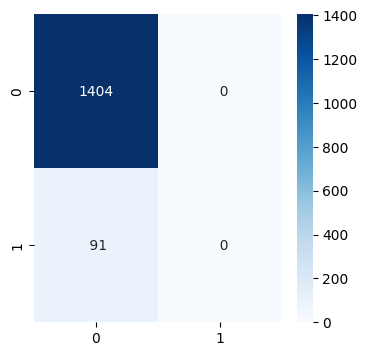

In [359]:
predictions = xgb_or.predict(od_test)
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='3g')
plt.show()

In [360]:
print('train:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_train, xgb_tr.predict(td_train))))
print('precision = {0}'.format(metrics.precision_score(y_train, xgb_tr.predict(td_train))))
print('recall = {0}'.format(metrics.recall_score(y_train, xgb_tr.predict(td_train))))
print('f1 = {0}'.format(metrics.f1_score(y_train, xgb_tr.predict(td_train))))
print('test:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_test, xgb_tr.predict(td_test))))
print('precision = {0}'.format(metrics.precision_score(y_test, xgb_tr.predict(td_test))))
print('recall = {0}'.format(metrics.recall_score(y_test, xgb_tr.predict(td_test))))
print('f1 = {0}'.format(metrics.f1_score(y_test, xgb_tr.predict(td_test))))

train:
accuracy = 0.9549627079747561
precision = 0.0
recall = 0.0
f1 = 0.0
test:
accuracy = 0.9391304347826087
precision = 0.0
recall = 0.0
f1 = 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


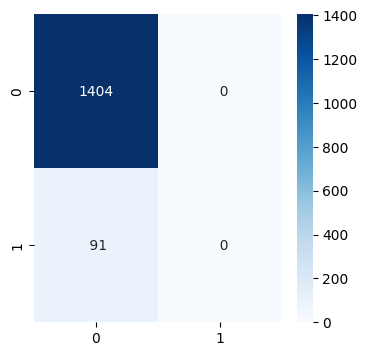

In [361]:
predictions = xgb_tr.predict(td_test)
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='3g')
plt.show()

# Балансирование данных путём изменения весов классов

балансируем данные

In [362]:
class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)

разбиваем выборку

In [363]:
od_train, od_test, y_train, y_test = train_test_split(origin_data, y, test_size=0.3, random_state=52)
td_train, td_test, y_train, y_test = train_test_split(transform_data, y, test_size=0.3, random_state=52)

## Выбираем лучшие параметры для моделей

дерево решений

In [364]:
GDCV = GridSearchCV( DecisionTreeClassifier(class_weight=dict(enumerate(class_weights))),
                     param_grid=[ { 'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                                    'min_samples_split': [3, 5, 8, 13, 21],
                                    'min_samples_leaf': [3, 5, 8, 13, 21] } ],
                     cv=5,
                     scoring='accuracy' )
GDCV.fit(origin_data, y)
GDCV.best_params_

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


{'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 3}

случайный лес

In [365]:
GDCV = GridSearchCV( RandomForestClassifier(class_weight=dict(enumerate(class_weights))),
                     param_grid=[ { 'max_depth': [10],
                                    'min_samples_split': [5],
                                    'min_samples_leaf': [3],
                                    'max_features': [40, 60, 70, 80, 100],
                                    'n_estimators': list(range(1, 100 + 1, 10)) } ],
                     cv=5,
                     scoring='accuracy' )
GDCV.fit(origin_data, y)
GDCV.best_params_

{'max_depth': 10,
 'max_features': 80,
 'min_samples_leaf': 3,
 'min_samples_split': 5,
 'n_estimators': 61}

## Обучение моделей с вычисленными параметрами

### дерево решений

In [366]:
dt_or = DecisionTreeClassifier(max_depth=10, min_samples_leaf=3, min_samples_split=5)
dt_tr = DecisionTreeClassifier(max_depth=10, min_samples_leaf=3, min_samples_split=5)

dt_or.fit(od_train, y_train)
dt_tr.fit(td_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=3, min_samples_split=5)

In [367]:
print('train:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_train, dt_or.predict(od_train))))
print('precision = {0}'.format(metrics.precision_score(y_train, dt_or.predict(od_train))))
print('recall = {0}'.format(metrics.recall_score(y_train, dt_or.predict(od_train))))
print('f1 = {0}'.format(metrics.f1_score(y_train, dt_or.predict(od_train))))
print('test:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_test, dt_or.predict(od_test))))
print('precision = {0}'.format(metrics.precision_score(y_test, dt_or.predict(od_test))))
print('recall = {0}'.format(metrics.recall_score(y_test, dt_or.predict(od_test))))
print('f1 = {0}'.format(metrics.f1_score(y_test, dt_or.predict(od_test))))

train:
accuracy = 0.9618473895582329
precision = 0.7307692307692307
recall = 0.24203821656050956
f1 = 0.36363636363636365
test:
accuracy = 0.934448160535117
precision = 0.3157894736842105
recall = 0.06593406593406594
f1 = 0.10909090909090909


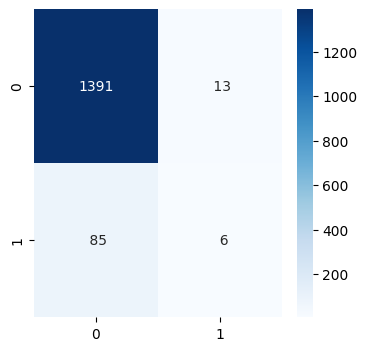

In [368]:
predictions = dt_or.predict(od_test)
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='3g')
plt.show()

In [369]:
print('train:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_train, dt_tr.predict(td_train))))
print('precision = {0}'.format(metrics.precision_score(y_train, dt_tr.predict(td_train))))
print('recall = {0}'.format(metrics.recall_score(y_train, dt_tr.predict(td_train))))
print('f1 = {0}'.format(metrics.f1_score(y_train, dt_tr.predict(td_train))))
print('test:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_test, dt_tr.predict(td_test))))
print('precision = {0}'.format(metrics.precision_score(y_test, dt_tr.predict(td_test))))
print('recall = {0}'.format(metrics.recall_score(y_test, dt_tr.predict(td_test))))
print('f1 = {0}'.format(metrics.f1_score(y_test, dt_tr.predict(td_test))))

train:
accuracy = 0.9555364314400459
precision = 0.6
recall = 0.03821656050955414
f1 = 0.0718562874251497
test:
accuracy = 0.9384615384615385
precision = 0.3333333333333333
recall = 0.01098901098901099
f1 = 0.02127659574468085


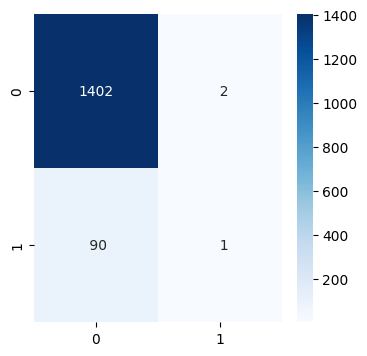

In [370]:
predictions = dt_tr.predict(td_test)
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='3g')
plt.show()

### случайный лес

In [371]:
rf_or = RandomForestClassifier(max_depth=10, max_features=80, min_samples_leaf=3, min_samples_split=5, n_estimators=81)
rf_tr = RandomForestClassifier(max_depth=10, max_features=80, min_samples_leaf=3, min_samples_split=5, n_estimators=81)

rf_or.fit(od_train, y_train)
rf_tr.fit(td_train, y_train)

RandomForestClassifier(max_depth=10, max_features=80, min_samples_leaf=3,
                       min_samples_split=5, n_estimators=81)

In [372]:
print('train:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_train, rf_or.predict(od_train))))
print('precision = {0}'.format(metrics.precision_score(y_train, rf_or.predict(od_train))))
print('recall = {0}'.format(metrics.recall_score(y_train, rf_or.predict(od_train))))
print('f1 = {0}'.format(metrics.f1_score(y_train, rf_or.predict(od_train))))
print('test:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_test, rf_or.predict(od_test))))
print('precision = {0}'.format(metrics.precision_score(y_test, rf_or.predict(od_test))))
print('recall = {0}'.format(metrics.recall_score(y_test, rf_or.predict(od_test))))
print('f1 = {0}'.format(metrics.f1_score(y_test, rf_or.predict(od_test))))

train:
accuracy = 0.9584050487664946
precision = 1.0
recall = 0.07643312101910828
f1 = 0.14201183431952663
test:
accuracy = 0.9384615384615385
precision = 0.3333333333333333
recall = 0.01098901098901099
f1 = 0.02127659574468085


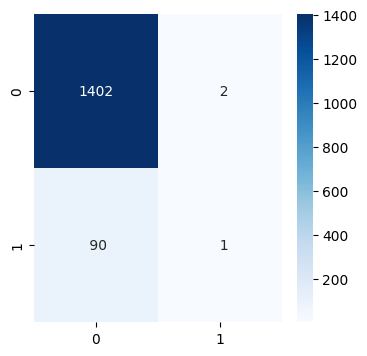

In [373]:
predictions = rf_or.predict(od_test)
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='3g')
plt.show()

In [374]:
print('train:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_train, rf_tr.predict(td_train))))
print('precision = {0}'.format(metrics.precision_score(y_train, rf_tr.predict(td_train))))
print('recall = {0}'.format(metrics.recall_score(y_train, rf_tr.predict(td_train))))
print('f1 = {0}'.format(metrics.f1_score(y_train, rf_tr.predict(td_train))))
print('test:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_test, rf_tr.predict(td_test))))
print('precision = {0}'.format(metrics.precision_score(y_test, rf_tr.predict(td_test))))
print('recall = {0}'.format(metrics.recall_score(y_test, rf_tr.predict(td_test))))
print('f1 = {0}'.format(metrics.f1_score(y_test, rf_tr.predict(td_test))))

train:
accuracy = 0.9555364314400459
precision = 0.6
recall = 0.03821656050955414
f1 = 0.0718562874251497
test:
accuracy = 0.937123745819398
precision = 0.0
recall = 0.0
f1 = 0.0


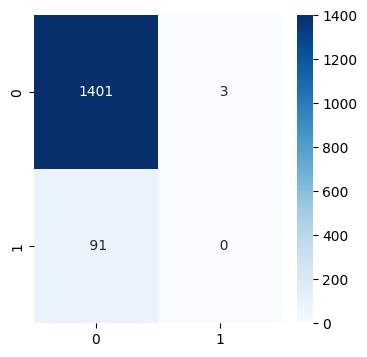

In [375]:
predictions = rf_tr.predict(td_test)
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='3g')
plt.show()

# Балансирование данных путём оверсемплинга

балансируем данные

In [376]:
ros = RandomOverSampler()
od_resampled, y_resampled = ros.fit_resample(origin_data, y)
td_resampled, y_resampled = ros.fit_resample(transform_data, y)

разбиваем выборку

In [377]:
od_train, od_test, y_train, y_test = train_test_split(od_resampled, y_resampled, test_size=0.3, random_state=52)
td_train, td_test, y_train, y_test = train_test_split(td_resampled, y_resampled, test_size=0.3, random_state=52)

## Выбираем лучшие параметры для моделей

дерево решений

In [378]:
GDCV = GridSearchCV( DecisionTreeClassifier(),
                     param_grid=[ { 'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                                    'min_samples_split': [3, 5, 8, 13, 21],
                                    'min_samples_leaf': [3, 5, 8, 13, 21] } ],
                     cv=5,
                     scoring='accuracy' )
GDCV.fit(origin_data, y)
GDCV.best_params_

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


{'max_depth': 3, 'min_samples_leaf': 8, 'min_samples_split': 3}

случайный лес

In [379]:
GDCV = GridSearchCV( RandomForestClassifier(),
                     param_grid=[ { 'max_depth': [3],
                                    'min_samples_split': [3],
                                    'min_samples_leaf': [8],
                                    'max_features': [40, 60, 70, 80, 100],
                                    'n_estimators': list(range(1, 100 + 1, 10)) } ],
                     cv=5,
                     scoring='accuracy' )
GDCV.fit(origin_data, y)
GDCV.best_params_

{'max_depth': 3,
 'max_features': 40,
 'min_samples_leaf': 8,
 'min_samples_split': 3,
 'n_estimators': 11}

градиентный бустинг

In [380]:
GDCV = GridSearchCV( xgb.XGBClassifier(),
                     param_grid=[ { 'max_depth': [3],
                                    'eta': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                                    'n_estimators': list(range(1, 100 + 1, 10)) } ], cv=5, scoring='accuracy' )
GDCV.fit(origin_data, y)
GDCV.best_params_

{'eta': 0.1, 'max_depth': 3, 'n_estimators': 1}

## Обучение моделей с вычисленными параметрами

### дерево решений

In [381]:
dt_or = DecisionTreeClassifier(max_depth=3, min_samples_leaf=8, min_samples_split=3)
dt_tr = DecisionTreeClassifier(max_depth=3, min_samples_leaf=8, min_samples_split=3)

dt_or.fit(od_train, y_train)
dt_tr.fit(td_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=8, min_samples_split=3)

In [382]:
print('train:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_train, dt_or.predict(od_train))))
print('precision = {0}'.format(metrics.precision_score(y_train, dt_or.predict(od_train))))
print('recall = {0}'.format(metrics.recall_score(y_train, dt_or.predict(od_train))))
print('f1 = {0}'.format(metrics.f1_score(y_train, dt_or.predict(od_train))))
print('test:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_test, dt_or.predict(od_test))))
print('precision = {0}'.format(metrics.precision_score(y_test, dt_or.predict(od_test))))
print('recall = {0}'.format(metrics.recall_score(y_test, dt_or.predict(od_test))))
print('f1 = {0}'.format(metrics.f1_score(y_test, dt_or.predict(od_test))))

train:
accuracy = 0.7629037126471476
precision = 0.7818957035093473
recall = 0.7246200607902735
f1 = 0.7521691118472945
test:
accuracy = 0.7647887323943662
precision = 0.7969348659003831
recall = 0.7207207207207207
f1 = 0.7569141193595342


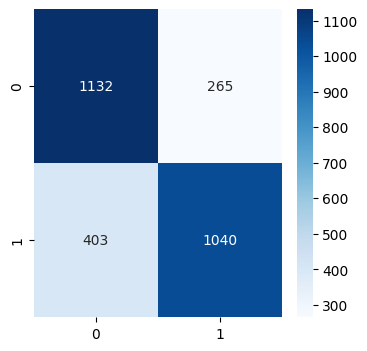

In [383]:
predictions = dt_or.predict(od_test)
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='3g')
plt.show()

In [384]:
print('train:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_train, dt_tr.predict(td_train))))
print('precision = {0}'.format(metrics.precision_score(y_train, dt_tr.predict(td_train))))
print('recall = {0}'.format(metrics.recall_score(y_train, dt_tr.predict(td_train))))
print('f1 = {0}'.format(metrics.f1_score(y_train, dt_tr.predict(td_train))))
print('test:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_test, dt_tr.predict(td_test))))
print('precision = {0}'.format(metrics.precision_score(y_test, dt_tr.predict(td_test))))
print('recall = {0}'.format(metrics.recall_score(y_test, dt_tr.predict(td_test))))
print('f1 = {0}'.format(metrics.f1_score(y_test, dt_tr.predict(td_test))))

train:
accuracy = 0.7662239661937821
precision = 0.7834581569521328
recall = 0.731306990881459
f1 = 0.756484829429335
test:
accuracy = 0.7690140845070422
precision = 0.7987851176917237
recall = 0.729036729036729
f1 = 0.7623188405797101


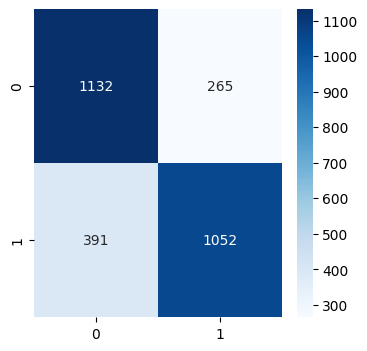

In [385]:
predictions = dt_tr.predict(td_test)
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='3g')
plt.show()

### случайный лес

In [386]:
rf_or = RandomForestClassifier(max_depth=3, max_features=40, min_samples_leaf=8, min_samples_split=3, n_estimators=50)
rf_tr = RandomForestClassifier(max_depth=3, max_features=40, min_samples_leaf=8, min_samples_split=3, n_estimators=50)

rf_or.fit(od_train, y_train)
rf_tr.fit(td_train, y_train)

RandomForestClassifier(max_depth=3, max_features=40, min_samples_leaf=8,
                       min_samples_split=3, n_estimators=50)

In [387]:
print('train:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_train, rf_or.predict(od_train))))
print('precision = {0}'.format(metrics.precision_score(y_train, rf_or.predict(od_train))))
print('recall = {0}'.format(metrics.recall_score(y_train, rf_or.predict(od_train))))
print('f1 = {0}'.format(metrics.f1_score(y_train, rf_or.predict(od_train))))
print('test:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_test, rf_or.predict(od_test))))
print('precision = {0}'.format(metrics.precision_score(y_test, rf_or.predict(od_test))))
print('recall = {0}'.format(metrics.recall_score(y_test, rf_or.predict(od_test))))
print('f1 = {0}'.format(metrics.f1_score(y_test, rf_or.predict(od_test))))

train:
accuracy = 0.7629037126471476
precision = 0.7818957035093473
recall = 0.7246200607902735
f1 = 0.7521691118472945
test:
accuracy = 0.7647887323943662
precision = 0.7969348659003831
recall = 0.7207207207207207
f1 = 0.7569141193595342


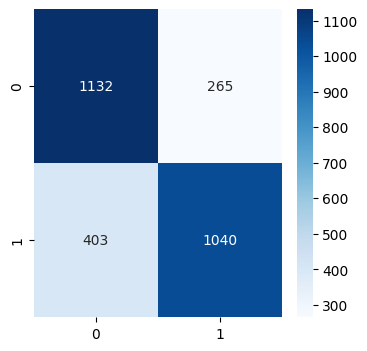

In [388]:
predictions = rf_or.predict(od_test)
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='3g')
plt.show()

In [389]:
print('train:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_train, rf_tr.predict(td_train))))
print('precision = {0}'.format(metrics.precision_score(y_train, rf_tr.predict(td_train))))
print('recall = {0}'.format(metrics.recall_score(y_train, rf_tr.predict(td_train))))
print('f1 = {0}'.format(metrics.f1_score(y_train, rf_tr.predict(td_train))))
print('test:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_test, rf_tr.predict(td_test))))
print('precision = {0}'.format(metrics.precision_score(y_test, rf_tr.predict(td_test))))
print('recall = {0}'.format(metrics.recall_score(y_test, rf_tr.predict(td_test))))
print('f1 = {0}'.format(metrics.f1_score(y_test, rf_tr.predict(td_test))))

train:
accuracy = 0.7662239661937821
precision = 0.7834581569521328
recall = 0.731306990881459
f1 = 0.756484829429335
test:
accuracy = 0.7690140845070422
precision = 0.7987851176917237
recall = 0.729036729036729
f1 = 0.7623188405797101


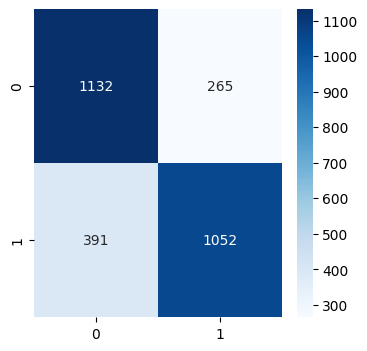

In [390]:
predictions = rf_tr.predict(td_test)
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='3g')
plt.show()

### градиентный бустинг

In [391]:
xgb_or = xgb.XGBClassifier(max_depth=3, n_estimators=8, eta=0.1)
xgb_tr = xgb.XGBClassifier(max_depth=3, n_estimators=8, eta=0.1)

xgb_or.fit(od_train, y_train)
xgb_tr.fit(td_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.1, eval_metric=None,
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=8,
              n_jobs=None, num_parallel_tree=None, ...)

In [392]:
print('train:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_train, xgb_or.predict(od_train))))
print('precision = {0}'.format(metrics.precision_score(y_train, xgb_or.predict(od_train))))
print('recall = {0}'.format(metrics.recall_score(y_train, xgb_or.predict(od_train))))
print('f1 = {0}'.format(metrics.f1_score(y_train, xgb_or.predict(od_train))))
print('test:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_test, xgb_or.predict(od_test))))
print('precision = {0}'.format(metrics.precision_score(y_test, xgb_or.predict(od_test))))
print('recall = {0}'.format(metrics.recall_score(y_test, xgb_or.predict(od_test))))
print('f1 = {0}'.format(metrics.f1_score(y_test, xgb_or.predict(od_test))))

train:
accuracy = 0.7678840929670993
precision = 0.7067012741859368
recall = 0.9103343465045592
f1 = 0.7956960680127524
test:
accuracy = 0.7598591549295775
precision = 0.7071311921611323
recall = 0.9002079002079002
f1 = 0.7920731707317074


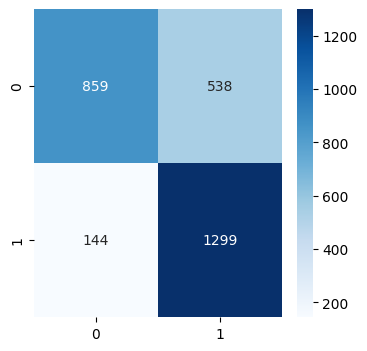

In [393]:
predictions = xgb_or.predict(od_test)
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='3g')
plt.show()

In [394]:
print('train:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_train, xgb_tr.predict(td_train))))
print('precision = {0}'.format(metrics.precision_score(y_train, xgb_tr.predict(td_train))))
print('recall = {0}'.format(metrics.recall_score(y_train, xgb_tr.predict(td_train))))
print('f1 = {0}'.format(metrics.f1_score(y_train, xgb_tr.predict(td_train))))
print('test:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_test, xgb_tr.predict(td_test))))
print('precision = {0}'.format(metrics.precision_score(y_test, xgb_tr.predict(td_test))))
print('recall = {0}'.format(metrics.recall_score(y_test, xgb_tr.predict(td_test))))
print('f1 = {0}'.format(metrics.f1_score(y_test, xgb_tr.predict(td_test))))

train:
accuracy = 0.7707515846664654
precision = 0.778722064841045
recall = 0.7519756838905776
f1 = 0.76511520024741
test:
accuracy = 0.7721830985915493
precision = 0.7913616398243045
recall = 0.7491337491337491
f1 = 0.7696689213243147


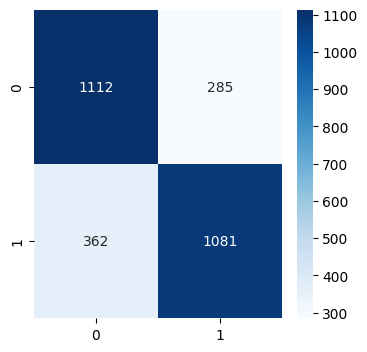

In [395]:
predictions = xgb_tr.predict(td_test)
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='3g')
plt.show()

# Балансирование данных путём андерсемплинга

балансируем данные

In [396]:
ros = RandomUnderSampler()
od_resampled, y_resampled = ros.fit_resample(origin_data, y)
td_resampled, y_resampled = ros.fit_resample(transform_data, y)

разбиваем выборку

In [397]:
od_train, od_test, y_train, y_test = train_test_split(od_resampled, y_resampled, test_size=0.3, random_state=52)
td_train, td_test, y_train, y_test = train_test_split(td_resampled, y_resampled, test_size=0.3, random_state=52)

## Выбираем лучшие параметры для моделей

дерево решений

In [398]:
GDCV = GridSearchCV( DecisionTreeClassifier(),
                     param_grid=[ { 'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                                    'min_samples_split': [3, 5, 8, 13, 21],
                                    'min_samples_leaf': [3, 5, 8, 13, 21] } ],
                     cv=5,
                     scoring='accuracy' )
GDCV.fit(origin_data, y)
GDCV.best_params_

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


{'max_depth': 3, 'min_samples_leaf': 8, 'min_samples_split': 3}

случайный лес

In [399]:
GDCV = GridSearchCV( RandomForestClassifier(),
                     param_grid=[ { 'max_depth': [10],
                                    'min_samples_split': [5],
                                    'min_samples_leaf': [3],
                                    'max_features': [40, 60, 70, 80, 100],
                                    'n_estimators': list(range(1, 100 + 1, 10)) } ],
                     cv=5,
                     scoring='accuracy' )
GDCV.fit(origin_data, y)
GDCV.best_params_

{'max_depth': 10,
 'max_features': 60,
 'min_samples_leaf': 3,
 'min_samples_split': 5,
 'n_estimators': 81}

градиентный бустинг

In [400]:
GDCV = GridSearchCV( xgb.XGBClassifier(),
                     param_grid=[ { 'max_depth': [10],
                                    'eta': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                                    'n_estimators': list(range(1, 100 + 1, 10)) } ], cv=5, scoring='accuracy' )
GDCV.fit(origin_data, y)
GDCV.best_params_

{'eta': 0.1, 'max_depth': 10, 'n_estimators': 1}

## Обучение моделей с вычисленными параметрами

### дерево решений

In [401]:
dt_or = DecisionTreeClassifier(max_depth=3, min_samples_leaf=8, min_samples_split=3)
dt_tr = DecisionTreeClassifier(max_depth=3, min_samples_leaf=8, min_samples_split=3)

dt_or.fit(od_train, y_train)
dt_tr.fit(td_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=8, min_samples_split=3)

In [402]:
print('train:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_train, dt_or.predict(od_train))))
print('precision = {0}'.format(metrics.precision_score(y_train, dt_or.predict(od_train))))
print('recall = {0}'.format(metrics.recall_score(y_train, dt_or.predict(od_train))))
print('f1 = {0}'.format(metrics.f1_score(y_train, dt_or.predict(od_train))))
print('test:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_test, dt_or.predict(od_test))))
print('precision = {0}'.format(metrics.precision_score(y_test, dt_or.predict(od_test))))
print('recall = {0}'.format(metrics.recall_score(y_test, dt_or.predict(od_test))))
print('f1 = {0}'.format(metrics.f1_score(y_test, dt_or.predict(od_test))))

train:
accuracy = 0.7492795389048992
precision = 0.7647058823529411
recall = 0.7344632768361582
f1 = 0.7492795389048992
test:
accuracy = 0.7449664429530202
precision = 0.746268656716418
recall = 0.704225352112676
f1 = 0.7246376811594203


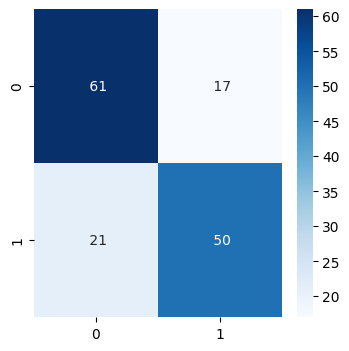

In [403]:
predictions = dt_or.predict(od_test)
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='3g')
plt.show()

In [404]:
print('train:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_train, dt_tr.predict(td_train))))
print('precision = {0}'.format(metrics.precision_score(y_train, dt_tr.predict(td_train))))
print('recall = {0}'.format(metrics.recall_score(y_train, dt_tr.predict(td_train))))
print('f1 = {0}'.format(metrics.f1_score(y_train, dt_tr.predict(td_train))))
print('test:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_test, dt_tr.predict(td_test))))
print('precision = {0}'.format(metrics.precision_score(y_test, dt_tr.predict(td_test))))
print('recall = {0}'.format(metrics.recall_score(y_test, dt_tr.predict(td_test))))
print('f1 = {0}'.format(metrics.f1_score(y_test, dt_tr.predict(td_test))))

train:
accuracy = 0.7146974063400576
precision = 0.7191011235955056
recall = 0.7231638418079096
f1 = 0.7211267605633803
test:
accuracy = 0.7248322147651006
precision = 0.7205882352941176
recall = 0.6901408450704225
f1 = 0.7050359712230215


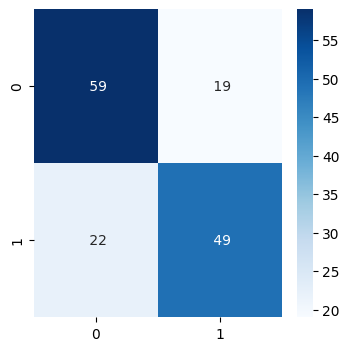

In [405]:
predictions = dt_tr.predict(td_test)
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='3g')
plt.show()

### случайный лес

In [406]:
rf_or = RandomForestClassifier(max_depth=10, max_features=100, min_samples_leaf=3, min_samples_split=5, n_estimators=91)
rf_tr = RandomForestClassifier(max_depth=10, max_features=100, min_samples_leaf=3, min_samples_split=5, n_estimators=91)

rf_or.fit(od_train, y_train)
rf_tr.fit(td_train, y_train)

RandomForestClassifier(max_depth=10, max_features=100, min_samples_leaf=3,
                       min_samples_split=5, n_estimators=91)

In [407]:
print('train:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_train, rf_or.predict(od_train))))
print('precision = {0}'.format(metrics.precision_score(y_train, rf_or.predict(od_train))))
print('recall = {0}'.format(metrics.recall_score(y_train, rf_or.predict(od_train))))
print('f1 = {0}'.format(metrics.f1_score(y_train, rf_or.predict(od_train))))
print('test:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_test, rf_or.predict(od_test))))
print('precision = {0}'.format(metrics.precision_score(y_test, rf_or.predict(od_test))))
print('recall = {0}'.format(metrics.recall_score(y_test, rf_or.predict(od_test))))
print('f1 = {0}'.format(metrics.f1_score(y_test, rf_or.predict(od_test))))

train:
accuracy = 0.8472622478386167
precision = 0.8229166666666666
recall = 0.8926553672316384
f1 = 0.8563685636856369
test:
accuracy = 0.7516778523489933
precision = 0.7236842105263158
recall = 0.7746478873239436
f1 = 0.7482993197278912


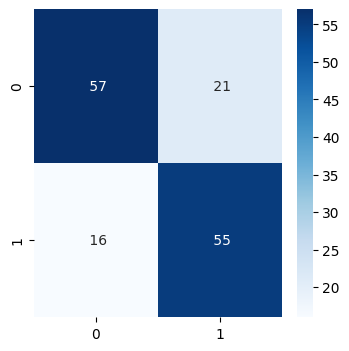

In [408]:
predictions = rf_or.predict(od_test)
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='3g')
plt.show()

In [409]:
print('train:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_train, rf_tr.predict(td_train))))
print('precision = {0}'.format(metrics.precision_score(y_train, rf_tr.predict(td_train))))
print('recall = {0}'.format(metrics.recall_score(y_train, rf_tr.predict(td_train))))
print('f1 = {0}'.format(metrics.f1_score(y_train, rf_tr.predict(td_train))))
print('test:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_test, rf_tr.predict(td_test))))
print('precision = {0}'.format(metrics.precision_score(y_test, rf_tr.predict(td_test))))
print('recall = {0}'.format(metrics.recall_score(y_test, rf_tr.predict(td_test))))
print('f1 = {0}'.format(metrics.f1_score(y_test, rf_tr.predict(td_test))))

train:
accuracy = 0.7723342939481268
precision = 0.7752808988764045
recall = 0.7796610169491526
f1 = 0.7774647887323943
test:
accuracy = 0.7315436241610739
precision = 0.7384615384615385
recall = 0.676056338028169
f1 = 0.7058823529411765


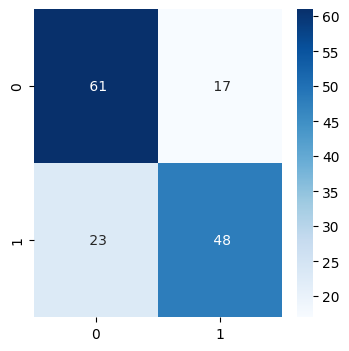

In [410]:
predictions = rf_tr.predict(td_test)
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='3g')
plt.show()

### градиентный бустинг

In [411]:
xgb_or = xgb.XGBClassifier(max_depth=10, n_estimators=1, eta=0.1)
xgb_tr = xgb.XGBClassifier(max_depth=10, n_estimators=1, eta=0.1)

xgb_or.fit(od_train, y_train)
xgb_tr.fit(td_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.1, eval_metric=None,
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=1,
              n_jobs=None, num_parallel_tree=None, ...)

In [412]:
print('train:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_train, xgb_or.predict(od_train))))
print('precision = {0}'.format(metrics.precision_score(y_train, xgb_or.predict(od_train))))
print('recall = {0}'.format(metrics.recall_score(y_train, xgb_or.predict(od_train))))
print('f1 = {0}'.format(metrics.f1_score(y_train, xgb_or.predict(od_train))))
print('test:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_test, xgb_or.predict(od_test))))
print('precision = {0}'.format(metrics.precision_score(y_test, xgb_or.predict(od_test))))
print('recall = {0}'.format(metrics.recall_score(y_test, xgb_or.predict(od_test))))
print('f1 = {0}'.format(metrics.f1_score(y_test, xgb_or.predict(od_test))))

train:
accuracy = 0.7838616714697406
precision = 0.7256637168141593
recall = 0.9265536723163842
f1 = 0.8138957816377171
test:
accuracy = 0.7181208053691275
precision = 0.6593406593406593
recall = 0.8450704225352113
f1 = 0.7407407407407407


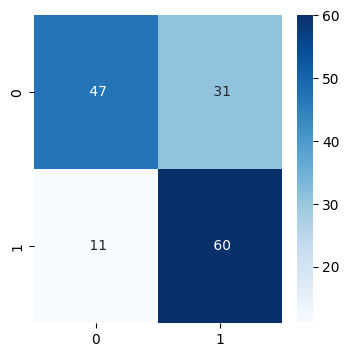

In [413]:
predictions = xgb_or.predict(od_test)
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='3g')
plt.show()

In [414]:
print('train:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_train, xgb_tr.predict(td_train))))
print('precision = {0}'.format(metrics.precision_score(y_train, xgb_tr.predict(td_train))))
print('recall = {0}'.format(metrics.recall_score(y_train, xgb_tr.predict(td_train))))
print('f1 = {0}'.format(metrics.f1_score(y_train, xgb_tr.predict(td_train))))
print('test:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_test, xgb_tr.predict(td_test))))
print('precision = {0}'.format(metrics.precision_score(y_test, xgb_tr.predict(td_test))))
print('recall = {0}'.format(metrics.recall_score(y_test, xgb_tr.predict(td_test))))
print('f1 = {0}'.format(metrics.f1_score(y_test, xgb_tr.predict(td_test))))

train:
accuracy = 0.7463976945244957
precision = 0.714975845410628
recall = 0.8361581920903954
f1 = 0.7708333333333334
test:
accuracy = 0.6442953020134228
precision = 0.618421052631579
recall = 0.6619718309859155
f1 = 0.6394557823129252


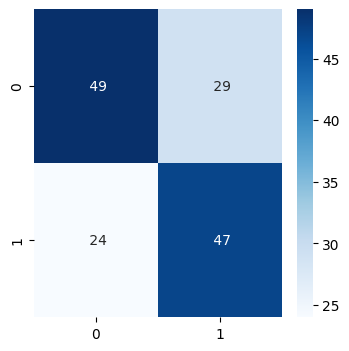

In [415]:
predictions = xgb_tr.predict(td_test)
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='3g')
plt.show()

# Балансирование данных путём генерации синтетических данных с помощью smote

балансируем данные

In [416]:
smote = SMOTE()
od_resampled, y_resampled = smote.fit_resample(origin_data, y)
td_resampled, y_resampled = smote.fit_resample(transform_data, y)

разбиваем выборку

In [417]:
od_train, od_test, y_train, y_test = train_test_split(od_resampled, y_resampled, test_size=0.3, random_state=52)
td_train, td_test, y_train, y_test = train_test_split(td_resampled, y_resampled, test_size=0.3, random_state=52)

## Выбираем лучшие параметры для моделей

дерево решений

In [418]:
GDCV = GridSearchCV( DecisionTreeClassifier(),
                     param_grid=[ { 'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                                    'min_samples_split': [3, 5, 8, 13, 21],
                                    'min_samples_leaf': [3, 5, 8, 13, 21] } ],
                     cv=5,
                     scoring='accuracy' )
GDCV.fit(origin_data, y)
GDCV.best_params_

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


{'max_depth': 3, 'min_samples_leaf': 8, 'min_samples_split': 3}

случайный лес

In [419]:
GDCV = GridSearchCV( RandomForestClassifier(),
                     param_grid=[ { 'max_depth': [10],
                                    'min_samples_split': [5],
                                    'min_samples_leaf': [3],
                                    'max_features': [40, 60, 70, 80, 100],
                                    'n_estimators': list(range(1, 100 + 1, 10)) } ],
                     cv=5,
                     scoring='accuracy' )
GDCV.fit(origin_data, y)
GDCV.best_params_

{'max_depth': 10,
 'max_features': 80,
 'min_samples_leaf': 3,
 'min_samples_split': 5,
 'n_estimators': 61}

градиентный бустинг

In [420]:
GDCV = GridSearchCV( xgb.XGBClassifier(),
                     param_grid=[ { 'max_depth': [10],
                                    'eta': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                                    'n_estimators': list(range(1, 100 + 1, 10)) } ], cv=5, scoring='accuracy' )
GDCV.fit(origin_data, y)
GDCV.best_params_

{'eta': 0.1, 'max_depth': 10, 'n_estimators': 1}

## Обучение моделей с вычисленными параметрами

### дерево решений

In [421]:
dt_or = DecisionTreeClassifier(max_depth=3, min_samples_leaf=8, min_samples_split=3)
dt_tr = DecisionTreeClassifier(max_depth=3, min_samples_leaf=8, min_samples_split=3)

dt_or.fit(od_train, y_train)
dt_tr.fit(td_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=8, min_samples_split=3)

In [422]:
print('train:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_train, dt_or.predict(od_train))))
print('precision = {0}'.format(metrics.precision_score(y_train, dt_or.predict(od_train))))
print('recall = {0}'.format(metrics.recall_score(y_train, dt_or.predict(od_train))))
print('f1 = {0}'.format(metrics.f1_score(y_train, dt_or.predict(od_train))))
print('test:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_test, dt_or.predict(od_test))))
print('precision = {0}'.format(metrics.precision_score(y_test, dt_or.predict(od_test))))
print('recall = {0}'.format(metrics.recall_score(y_test, dt_or.predict(od_test))))
print('f1 = {0}'.format(metrics.f1_score(y_test, dt_or.predict(od_test))))

train:
accuracy = 0.8235738001811047
precision = 0.7623052188968588
recall = 0.9367781155015198
f1 = 0.8405836628937678
test:
accuracy = 0.819718309859155
precision = 0.7640385706182643
recall = 0.9334719334719335
f1 = 0.8402994385527136


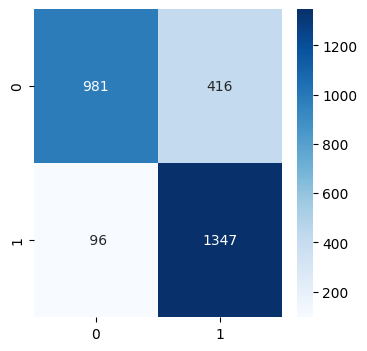

In [423]:
predictions = dt_or.predict(od_test)
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='3g')
plt.show()

In [424]:
print('train:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_train, dt_tr.predict(td_train))))
print('precision = {0}'.format(metrics.precision_score(y_train, dt_tr.predict(td_train))))
print('recall = {0}'.format(metrics.recall_score(y_train, dt_tr.predict(td_train))))
print('f1 = {0}'.format(metrics.f1_score(y_train, dt_tr.predict(td_train))))
print('test:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_test, dt_tr.predict(td_test))))
print('precision = {0}'.format(metrics.precision_score(y_test, dt_tr.predict(td_test))))
print('recall = {0}'.format(metrics.recall_score(y_test, dt_tr.predict(td_test))))
print('f1 = {0}'.format(metrics.f1_score(y_test, dt_tr.predict(td_test))))

train:
accuracy = 0.7884092967099305
precision = 0.7680295286768881
recall = 0.8221884498480243
f1 = 0.7941867293012331
test:
accuracy = 0.7816901408450704
precision = 0.7694826457105436
recall = 0.8142758142758143
f1 = 0.7912457912457912


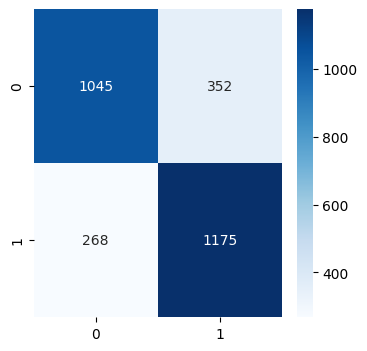

In [425]:
predictions = dt_tr.predict(td_test)
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='3g')
plt.show()

### случайный лес

In [426]:
rf_or = RandomForestClassifier(max_depth=10, max_features=60, min_samples_leaf=3, min_samples_split=5, n_estimators=61)
rf_tr = RandomForestClassifier(max_depth=10, max_features=60, min_samples_leaf=3, min_samples_split=5, n_estimators=61)

rf_or.fit(od_train, y_train)
rf_tr.fit(td_train, y_train)

RandomForestClassifier(max_depth=10, max_features=60, min_samples_leaf=3,
                       min_samples_split=5, n_estimators=61)

In [427]:
print('train:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_train, rf_or.predict(od_train))))
print('precision = {0}'.format(metrics.precision_score(y_train, rf_or.predict(od_train))))
print('recall = {0}'.format(metrics.recall_score(y_train, rf_or.predict(od_train))))
print('f1 = {0}'.format(metrics.f1_score(y_train, rf_or.predict(od_train))))
print('test:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_test, rf_or.predict(od_test))))
print('precision = {0}'.format(metrics.precision_score(y_test, rf_or.predict(od_test))))
print('recall = {0}'.format(metrics.recall_score(y_test, rf_or.predict(od_test))))
print('f1 = {0}'.format(metrics.f1_score(y_test, rf_or.predict(od_test))))

train:
accuracy = 0.9622698460609719
precision = 0.9611650485436893
recall = 0.9629179331306991
f1 = 0.962040692377771
test:
accuracy = 0.9478873239436619
precision = 0.9480968858131488
recall = 0.9494109494109494
f1 = 0.9487534626038782


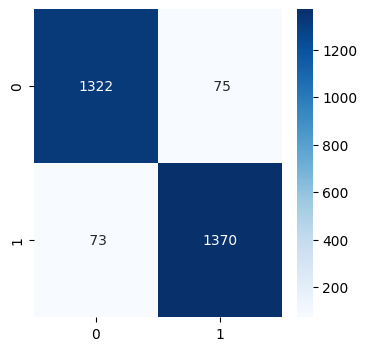

In [428]:
predictions = rf_or.predict(od_test)
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='3g')
plt.show()

In [429]:
print('train:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_train, rf_tr.predict(td_train))))
print('precision = {0}'.format(metrics.precision_score(y_train, rf_tr.predict(td_train))))
print('recall = {0}'.format(metrics.recall_score(y_train, rf_tr.predict(td_train))))
print('f1 = {0}'.format(metrics.f1_score(y_train, rf_tr.predict(td_train))))
print('test:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_test, rf_tr.predict(td_test))))
print('precision = {0}'.format(metrics.precision_score(y_test, rf_tr.predict(td_test))))
print('recall = {0}'.format(metrics.recall_score(y_test, rf_tr.predict(td_test))))
print('f1 = {0}'.format(metrics.f1_score(y_test, rf_tr.predict(td_test))))

train:
accuracy = 0.8836402052520375
precision = 0.8603719599427754
recall = 0.9139817629179331
f1 = 0.8863669859985261
test:
accuracy = 0.8704225352112676
precision = 0.8474466709760827
recall = 0.9085239085239085
f1 = 0.8769230769230769


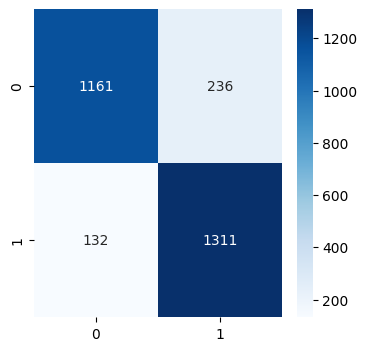

In [430]:
predictions = rf_tr.predict(td_test)
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='3g')
plt.show()

### градиентный бустинг

In [431]:
xgb_or = xgb.XGBClassifier(max_depth=10, n_estimators=1, eta=0.1)
xgb_tr = xgb.XGBClassifier(max_depth=10, n_estimators=1, eta=0.1)

xgb_or.fit(od_train, y_train)
xgb_tr.fit(td_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.1, eval_metric=None,
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=1,
              n_jobs=None, num_parallel_tree=None, ...)

In [432]:
print('train:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_train, xgb_or.predict(od_train))))
print('precision = {0}'.format(metrics.precision_score(y_train, xgb_or.predict(od_train))))
print('recall = {0}'.format(metrics.recall_score(y_train, xgb_or.predict(od_train))))
print('f1 = {0}'.format(metrics.f1_score(y_train, xgb_or.predict(od_train))))
print('test:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_test, xgb_or.predict(od_test))))
print('precision = {0}'.format(metrics.precision_score(y_test, xgb_or.predict(od_test))))
print('recall = {0}'.format(metrics.recall_score(y_test, xgb_or.predict(od_test))))
print('f1 = {0}'.format(metrics.f1_score(y_test, xgb_or.predict(od_test))))

train:
accuracy = 0.9311801992152128
precision = 0.9207244655581948
recall = 0.9425531914893617
f1 = 0.9315109642535296
test:
accuracy = 0.9193661971830986
precision = 0.9123641304347826
recall = 0.9306999306999307
f1 = 0.9214408233276158


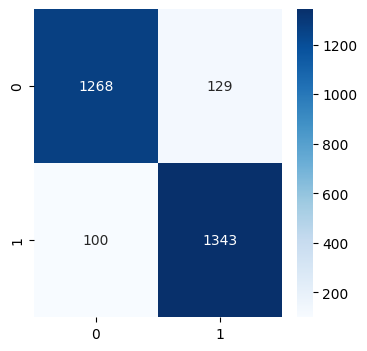

In [433]:
predictions = xgb_or.predict(od_test)
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='3g')
plt.show()

In [434]:
print('train:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_train, xgb_tr.predict(td_train))))
print('precision = {0}'.format(metrics.precision_score(y_train, xgb_tr.predict(td_train))))
print('recall = {0}'.format(metrics.recall_score(y_train, xgb_tr.predict(td_train))))
print('f1 = {0}'.format(metrics.f1_score(y_train, xgb_tr.predict(td_train))))
print('test:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_test, xgb_tr.predict(td_test))))
print('precision = {0}'.format(metrics.precision_score(y_test, xgb_tr.predict(td_test))))
print('recall = {0}'.format(metrics.recall_score(y_test, xgb_tr.predict(td_test))))
print('f1 = {0}'.format(metrics.f1_score(y_test, xgb_tr.predict(td_test))))

train:
accuracy = 0.8582855418050106
precision = 0.8556732223903177
recall = 0.8595744680851064
f1 = 0.8576194086429113
test:
accuracy = 0.8457746478873239
precision = 0.8425357873210634
recall = 0.8565488565488566
f1 = 0.8494845360824742


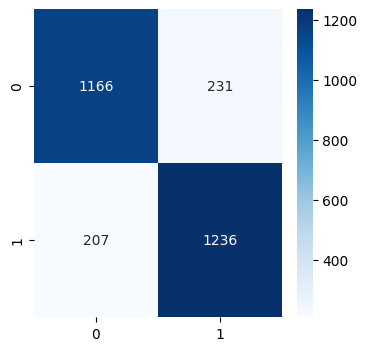

In [435]:
predictions = xgb_tr.predict(td_test)
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='3g')
plt.show()

# Балансирование данных путём генерации синтетических данных с помощью ADASYN

балансируем данные

In [445]:
adasyn = ADASYN()
od_resampled, y_od_resampled = adasyn.fit_resample(origin_data, y)
td_resampled, y_td_resampled = adasyn.fit_resample(transform_data, y)

разбиваем выборку

In [446]:
od_train, od_test, y_od_train, y_od_test = train_test_split(od_resampled, y_od_resampled, test_size=0.3, random_state=52)
td_train, td_test, y_td_train, y_td_test = train_test_split(td_resampled, y_td_resampled, test_size=0.3, random_state=52)

## Выбираем лучшие параметры для моделей

дерево решений

In [447]:
GDCV = GridSearchCV( DecisionTreeClassifier(),
                     param_grid=[ { 'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                                    'min_samples_split': [3, 5, 8, 13, 21],
                                    'min_samples_leaf': [3, 5, 8, 13, 21] } ],
                     cv=5,
                     scoring='accuracy' )
GDCV.fit(origin_data, y)
GDCV.best_params_

{'max_depth': 3, 'min_samples_leaf': 8, 'min_samples_split': 3}

случайный лес

In [448]:
GDCV = GridSearchCV( RandomForestClassifier(),
                     param_grid=[ { 'max_depth': [10],
                                    'min_samples_split': [5],
                                    'min_samples_leaf': [3],
                                    'max_features': [40, 60, 70, 80, 100],
                                    'n_estimators': list(range(1, 100 + 1, 10)) } ],
                     cv=5,
                     scoring='accuracy' )
GDCV.fit(origin_data, y)
GDCV.best_params_

{'max_depth': 10,
 'max_features': 70,
 'min_samples_leaf': 3,
 'min_samples_split': 5,
 'n_estimators': 61}

градиентный бустинг

In [449]:
GDCV = GridSearchCV( xgb.XGBClassifier(),
                     param_grid=[ { 'max_depth': [10],
                                    'eta': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                                    'n_estimators': list(range(1, 100 + 1, 10)) } ], cv=5, scoring='accuracy' )
GDCV.fit(origin_data, y)
GDCV.best_params_

{'eta': 0.1, 'max_depth': 10, 'n_estimators': 1}

## Обучение моделей с вычисленными параметрами

### дерево решений

In [451]:
dt_or = DecisionTreeClassifier(max_depth=3, min_samples_leaf=8, min_samples_split=3)
dt_tr = DecisionTreeClassifier(max_depth=3, min_samples_leaf=8, min_samples_split=3)

dt_or.fit(od_train, y_od_train)
dt_tr.fit(td_train, y_td_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=8, min_samples_split=3)

In [452]:
print('train:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_od_train, dt_or.predict(od_train))))
print('precision = {0}'.format(metrics.precision_score(y_od_train, dt_or.predict(od_train))))
print('recall = {0}'.format(metrics.recall_score(y_od_train, dt_or.predict(od_train))))
print('f1 = {0}'.format(metrics.f1_score(y_od_train, dt_or.predict(od_train))))
print('test:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_od_test, dt_or.predict(od_test))))
print('precision = {0}'.format(metrics.precision_score(y_od_test, dt_or.predict(od_test))))
print('recall = {0}'.format(metrics.recall_score(y_od_test, dt_or.predict(od_test))))
print('f1 = {0}'.format(metrics.f1_score(y_od_test, dt_or.predict(od_test))))

train:
accuracy = 0.8367408298256164
precision = 0.7980123556271824
recall = 0.8989409984871407
f1 = 0.8454752418895846
test:
accuracy = 0.8295932678821879
precision = 0.8020961775585697
recall = 0.8874488403819918
f1 = 0.8426165803108808


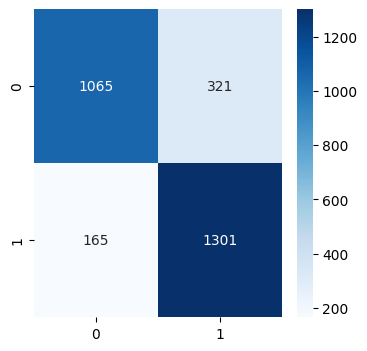

In [453]:
predictions = dt_or.predict(od_test)
cm = confusion_matrix(y_od_test, predictions)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='3g')
plt.show()

In [456]:
print('train:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_td_train, dt_tr.predict(td_train))))
print('precision = {0}'.format(metrics.precision_score(y_td_train, dt_tr.predict(td_train))))
print('recall = {0}'.format(metrics.recall_score(y_td_train, dt_tr.predict(td_train))))
print('f1 = {0}'.format(metrics.f1_score(y_td_train, dt_tr.predict(td_train))))
print('test:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_td_test, dt_tr.predict(td_test))))
print('precision = {0}'.format(metrics.precision_score(y_td_test, dt_tr.predict(td_test))))
print('recall = {0}'.format(metrics.recall_score(y_td_test, dt_tr.predict(td_test))))
print('f1 = {0}'.format(metrics.f1_score(y_td_test, dt_tr.predict(td_test))))

train:
accuracy = 0.7573740735138406
precision = 0.6919734735879259
recall = 0.9217179409077063
f1 = 0.790491118077325
test:
accuracy = 0.7501764290755116
precision = 0.6882506527415143
recall = 0.9223233030090973
f1 = 0.7882775119617225


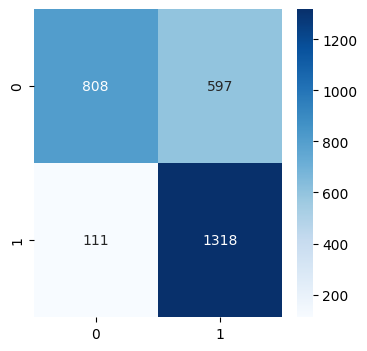

In [457]:
predictions = dt_tr.predict(td_test)
cm = confusion_matrix(y_td_test, predictions)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='3g')
plt.show()

### случайный лес

In [458]:
rf_or = RandomForestClassifier(max_depth=10, max_features=40, min_samples_leaf=3, min_samples_split=5, n_estimators=61)
rf_tr = RandomForestClassifier(max_depth=10, max_features=40, min_samples_leaf=3, min_samples_split=5, n_estimators=61)

rf_or.fit(od_train, y_od_train)
rf_tr.fit(td_train, y_td_train)

RandomForestClassifier(max_depth=10, max_features=40, min_samples_leaf=3,
                       min_samples_split=5, n_estimators=61)

In [459]:
print('train:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_od_train, rf_or.predict(od_train))))
print('precision = {0}'.format(metrics.precision_score(y_od_train, rf_or.predict(od_train))))
print('recall = {0}'.format(metrics.recall_score(y_od_train, rf_or.predict(od_train))))
print('f1 = {0}'.format(metrics.f1_score(y_od_train, rf_or.predict(od_train))))
print('test:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_od_test, rf_or.predict(od_test))))
print('precision = {0}'.format(metrics.precision_score(y_od_test, rf_or.predict(od_test))))
print('recall = {0}'.format(metrics.recall_score(y_od_test, rf_or.predict(od_test))))
print('f1 = {0}'.format(metrics.f1_score(y_od_test, rf_or.predict(od_test))))

train:
accuracy = 0.9624173180998196
precision = 0.9613409845967985
recall = 0.9630862329803328
f1 = 0.9622128174123338
test:
accuracy = 0.9488078541374474
precision = 0.9558011049723757
recall = 0.9440654843110505
f1 = 0.9498970487302677


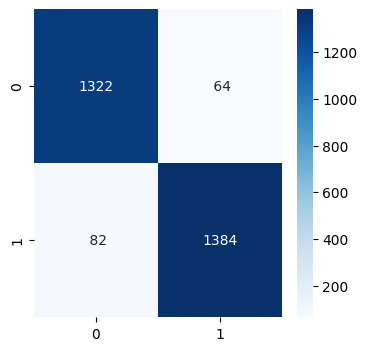

In [460]:
predictions = rf_or.predict(od_test)
cm = confusion_matrix(y_od_test, predictions)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='3g')
plt.show()

In [461]:
print('train:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_td_train, rf_tr.predict(td_train))))
print('precision = {0}'.format(metrics.precision_score(y_td_train, rf_tr.predict(td_train))))
print('recall = {0}'.format(metrics.recall_score(y_td_train, rf_tr.predict(td_train))))
print('f1 = {0}'.format(metrics.f1_score(y_td_train, rf_tr.predict(td_train))))
print('test:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_td_test, rf_tr.predict(td_test))))
print('precision = {0}'.format(metrics.precision_score(y_td_test, rf_tr.predict(td_test))))
print('recall = {0}'.format(metrics.recall_score(y_td_test, rf_tr.predict(td_test))))
print('f1 = {0}'.format(metrics.f1_score(y_td_test, rf_tr.predict(td_test))))

train:
accuracy = 0.9036454394191499
precision = 0.9095975232198142
recall = 0.8949131891562595
f1 = 0.9021956087824351
test:
accuracy = 0.884968242766408
precision = 0.8953405017921147
recall = 0.874037788663401
f1 = 0.8845609065155807


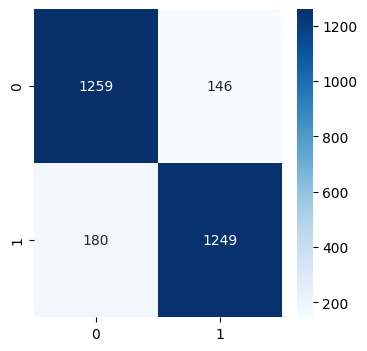

In [462]:
predictions = rf_tr.predict(td_test)
cm = confusion_matrix(y_td_test, predictions)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='3g')
plt.show()

### градиентный бустинг

In [463]:
xgb_or = xgb.XGBClassifier(max_depth=10, n_estimators=1, eta=0.1)
xgb_tr = xgb.XGBClassifier(max_depth=10, n_estimators=1, eta=0.1)

xgb_or.fit(od_train, y_od_train)
xgb_tr.fit(td_train, y_td_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.1, eval_metric=None,
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=1,
              n_jobs=None, num_parallel_tree=None, ...)

In [464]:
print('train:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_od_train, xgb_or.predict(od_train))))
print('precision = {0}'.format(metrics.precision_score(y_od_train, xgb_or.predict(od_train))))
print('recall = {0}'.format(metrics.recall_score(y_od_train, xgb_or.predict(od_train))))
print('f1 = {0}'.format(metrics.f1_score(y_od_train, xgb_or.predict(od_train))))
print('test:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_od_test, xgb_or.predict(od_test))))
print('precision = {0}'.format(metrics.precision_score(y_od_test, xgb_or.predict(od_test))))
print('recall = {0}'.format(metrics.recall_score(y_od_test, xgb_or.predict(od_test))))
print('f1 = {0}'.format(metrics.f1_score(y_od_test, xgb_or.predict(od_test))))

train:
accuracy = 0.935207456404089
precision = 0.9705304518664047
recall = 0.8968229954614221
f1 = 0.932222047491744
test:
accuracy = 0.9288218793828892
precision = 0.970917225950783
recall = 0.888130968622101
f1 = 0.9276807980049875


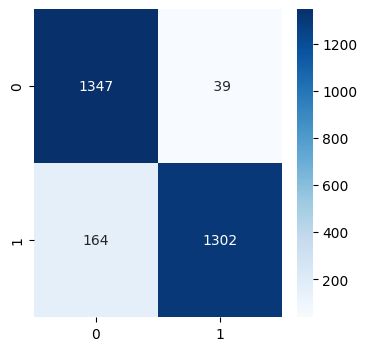

In [465]:
predictions = xgb_or.predict(od_test)
cm = confusion_matrix(y_od_test, predictions)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='3g')
plt.show()

In [467]:
print('train:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_td_train, xgb_tr.predict(td_train))))
print('precision = {0}'.format(metrics.precision_score(y_td_train, xgb_tr.predict(td_train))))
print('recall = {0}'.format(metrics.recall_score(y_td_train, xgb_tr.predict(td_train))))
print('f1 = {0}'.format(metrics.f1_score(y_td_train, xgb_tr.predict(td_train))))
print('test:')
print('accuracy = {0}'.format(metrics.accuracy_score(y_td_test, xgb_tr.predict(td_test))))
print('precision = {0}'.format(metrics.precision_score(y_td_test, xgb_tr.predict(td_test))))
print('recall = {0}'.format(metrics.recall_score(y_td_test, xgb_tr.predict(td_test))))
print('f1 = {0}'.format(metrics.f1_score(y_td_test, xgb_tr.predict(td_test))))

train:
accuracy = 0.855392527605506
precision = 0.8111794597485958
recall = 0.9238501370697533
f1 = 0.8638564511535175
test:
accuracy = 0.8345095271700776
precision = 0.7902055622732769
recall = 0.9146256123163051
f1 = 0.8478754459941615


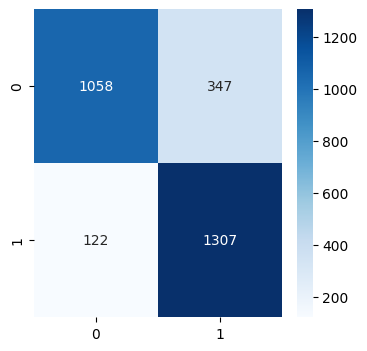

In [468]:
predictions = xgb_tr.predict(td_test)
cm = confusion_matrix(y_td_test, predictions)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='3g')
plt.show()